In [ ]:
!pip install gym

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install colabgymrender
#Video Game play Prerequisites

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for colabgymrender: filename=colabgymrender-1.1.0-py3-none-any.whl size=3130 sha256=ea464eb490ef1cf822b9f6ed5fdff9ace765678002e1cea065fc5161740b86b5
  Stored in directory: /root/.cache/pip/wheels/e4/d2/e1/cc1c940178ad92438325422b51c3e8c3d927b9ef8381da8840
Successfully built colabgymrender


In [ ]:
!pip install imageio==2.4.1
#Video Game play Prerequisites

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 68.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for imageio: filename=imageio-2.4.1-py3-none-any.whl size=3303886 sha256=f7fe7ac2452d0bb245348879a6558ba46e3cc4cc49005e9ae5208cd83d4394f8
  Stored in directory: /root/.cache/pip/wheels/be/7b/04/4d8d56f1d503e5c404f0de6018c0cfa592c71588a39b49e002
Successfully built imageio
  Attempting uninstall: imageio
    Found existing installation: imageio 2.9.0
    Uninstalling imageio-2.9.0:
      Successfully uninstalled imageio-2.9.0


In [ ]:
!pip install gym[toy_text]
#Video Game play Prerequisites

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 71.1 MB/s eta 0:00:00


In [ ]:
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"
#Video Game play Prerequisites

In [ ]:
import numpy as np
import gym
import random
import time
import matplotlib.pyplot as plt
#from IPython.display import clear_output
#import IPython.display

In [ ]:
from colabgymrender.recorder import Recorder

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)3325952/45929032 bytes (7.2%)6758400/45929032 bytes (14.7%)10223616/45929032 bytes (22.3%)13672448/45929032 bytes (29.8%)17063936/45929032 bytes (37.2%)20512768/45929032 bytes (44.7%)23977984/45929032 bytes (52.2%)27443200/45929032 bytes (59.8%)30892032/45929032 bytes (67.3%)34324480/45929032 bytes (74.7%)37715968/45929032 bytes (82.1%)41123840/45929032 bytes (89.5%)

# Environment - FrozenLake

https://www.gymlibrary.ml/environments/toy_text/frozen_lake/?highlight=frozen+lake 



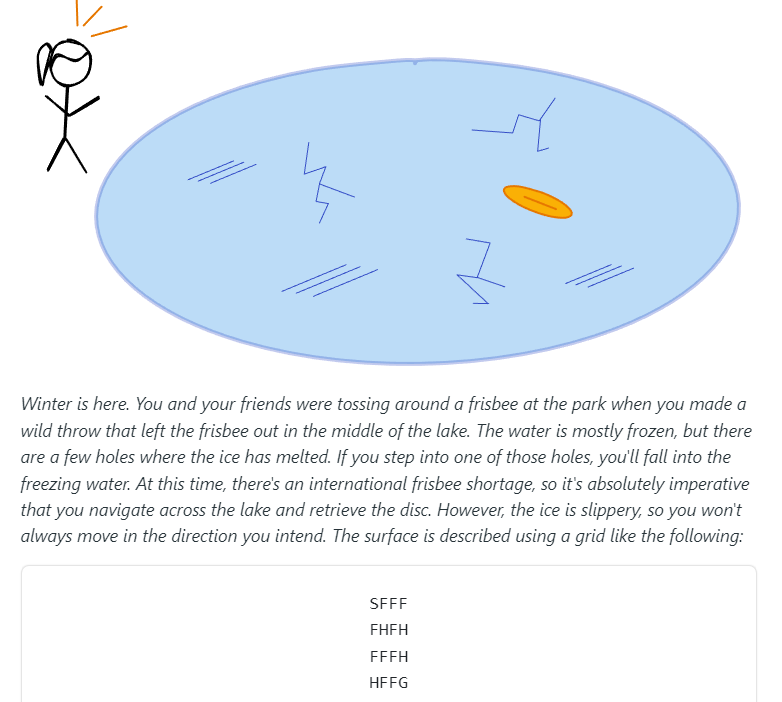

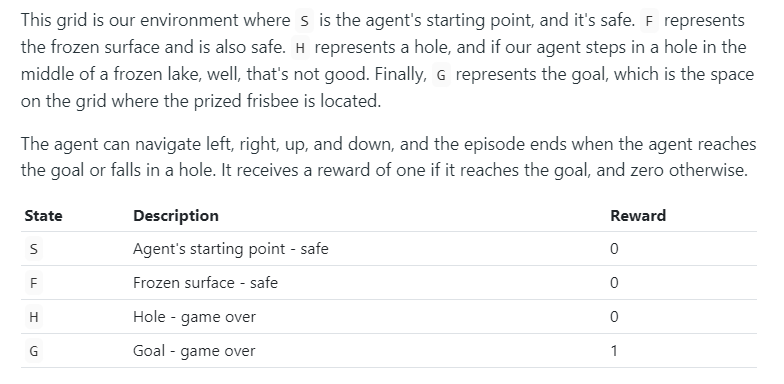

In [ ]:
env = gym.make('FrozenLake-v1')
directory = './video'
env = Recorder(env, directory)

  deprecation(

  deprecation(

See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(



Creating The Q-Table



> construct our Q-table, and initialize all the Q-values to zero for each state-action pair.

> Remember, the number of rows in the table is equivalent to the size of the state space in the environment, and the number of columns is equivalent to the size of the action space. 






In [ ]:
action_space_size = env.action_space.n                         #Size of action space i.e size of columns in Q_table
state_space_size = env.observation_space.n                     #Size of state space i.e size of rows in Q_table 

In [ ]:
print(env.action_space)

Discrete(4)


In [ ]:
print(env.observation_space)

Discrete(16)


In [ ]:
print(state_space_size)          

16


16 state >>

S F F F F H F H F F F H H F F G

In Grid form:

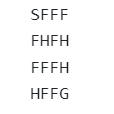

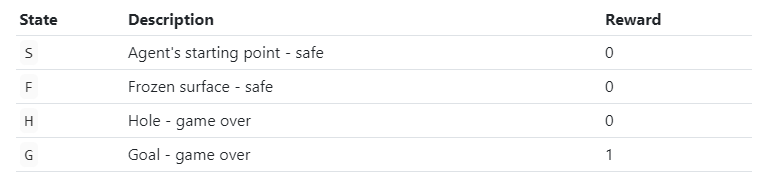

In [ ]:
print(action_space_size)         # right,left,up,down

4


In [ ]:
q_table = np.zeros((state_space_size, action_space_size))

In [ ]:
type(q_table)

numpy.ndarray

In [ ]:
q_table.shape

(16, 4)

In [ ]:
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


Initializing Q-Learning Parameters

In [ ]:
num_episodes = 10000
max_steps_per_episode = 100

learning_rate = 0.1
discount_rate = 0.99

exploration_rate = 1    # Epsilon
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001

Q-Learning Algorithm Training Loop

In [ ]:
rewards_all_episodes = []   #  this list to hold all of the rewards  get from each episode

for episode in range(num_episodes):          # Looping through each episode
    state = env.reset()                      # Reset the environment to starting state
    done = False                             # 'done' is to keep the track of episode completed or not.When initializing the episode , keep done as false..
    rewards_current_episode = 0              # Indicating currrent reward of episode , When initializing the episode, keep it zeo as not yet rewards to be collected.

    for step in range(max_steps_per_episode):
      exploration_rate_threshold = random.uniform(0, 1)     # A random threshold number between 0 and 1.
      if exploration_rate_threshold > exploration_rate:     
        action = np.argmax(q_table[state,:])                # When threshold is greater than exploration_rate do Exploitation - i.e Do the action with respect to highest q_value.
      else:
        action = env.action_space.sample() 

                                                           # When threshold is lower than or equal to exploration rate, do Explore - i.e the environment by doing sample an action randomly.
      new_state, reward, done, info = env.step(action)     # In step() method of 'env' object pass the 'action' picked by trade off between exploration and exploitation.
      # The function step() returns a tuple containing the new state, the reward for the action we took, whether or not the action ended our episode, and diagnostic information regarding our environment

      # Update Q-table for Q(s,a)
      q_table[state, action] = q_table[state, action] * (1 - learning_rate) + \
      learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))
      
      state = new_state   # set our current state to the new_state that was returned
      rewards_current_episode += reward     #update the rewards from  current episode by adding the reward  received for  previous action.

      if done == True: #check to see if  last action ended the episode.  If the action did end the episode, then  jump out of this loop and move on to the next episode.
        break

    # Exploration rate decay
    exploration_rate = min_exploration_rate + \
    (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
    #Once an episode is finished, update exploration_rate using exponential decay, 
    #which just means that the exploration rate decreases or decays at a rate proportional to its current value.

    rewards_all_episodes.append(rewards_current_episode)  #append the rewards from the current episode to the list of rewards from all episodes

In [ ]:
# state returns one number between 0 to 16 as total states of frozenlake -V1 is 16...
# action returns one number between 0 to 3 as available action are 4 i.e 0,1,2,3...

Calculate the average reward per thousand episodes 

In [ ]:
rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes),num_episodes/1000)
count = 1000

print("********Average reward per thousand episodes********\n")
for r in rewards_per_thousand_episodes:
    print(count, ": ", str(sum(r/1000)))
    count += 1000

#how the rewards changed over time.

********Average reward per thousand episodes********

1000 :  0.06100000000000005
2000 :  0.20200000000000015
3000 :  0.3910000000000003
4000 :  0.5600000000000004
5000 :  0.5900000000000004
6000 :  0.6390000000000005
7000 :  0.6700000000000005
8000 :  0.6670000000000005
9000 :  0.6970000000000005
10000 :  0.6980000000000005


In [ ]:
# Reaching the frisbee  70 percent of the time isn't too shabby, especially since the agent had no explicit instructions to reach the frisbee. It learned that this is the correct thing to do.

In [ ]:
# Print updated Q-table
print("\n\n********Q-table********\n")
print(q_table)



********Q-table********

[[0.56999878 0.51039262 0.50755258 0.51293781]
 [0.32673121 0.23856531 0.25660269 0.49702628]
 [0.41757239 0.4226257  0.41893592 0.47040394]
 [0.24351374 0.2058849  0.25233941 0.45779649]
 [0.5913647  0.40281916 0.46930082 0.32910565]
 [0.         0.         0.         0.        ]
 [0.34201705 0.17940591 0.16179214 0.08627685]
 [0.         0.         0.         0.        ]
 [0.3516196  0.35253689 0.41122892 0.63212358]
 [0.50467097 0.67994858 0.44388016 0.48262538]
 [0.67910475 0.34251401 0.28966337 0.30604469]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.40762742 0.5935302  0.76714371 0.60529134]
 [0.73902765 0.87412781 0.76715551 0.72431634]
 [0.         0.         0.         0.        ]]


Trained agent play Frozen Lake using the knowledge it's gained from the training

In [ ]:
for episode in range(10):       # Agent plays game for 10 episodes
    state = env.reset()         # Reset environment to have starting state after each episode
    done = False                # done is set to false as episode is just begun 
    print("*****EPISODE ", episode+1, "*****\n")            
    for step in range(max_steps_per_episode):   
      action = np.argmax(q_table[state,:])    # choose action from q table based on the state  (Trained Q_table)   
      new_state, reward, done, info = env.step(action)  # In step() method of 'env' object pass the 'action' picked by
      # The function step() returns a tuple containing the new state, the reward for the action we took, whether or not the action ended our episode, and diagnostic information regarding our environment
      if done == True :
        if reward == 1:
          print("****You reached the goal!****\n\n")
          env.play()     # Show the gameplay video at console
          print("#----------------------------#\n\n")
        else:
          print("****You failed to reach the goal!****\n\n")
          env.play()     # Show the gameplay video at console
          print("#----------------------------#\n\n")

        break
      state = new_state   #  Assign new_state as state        
env.close()  # Close the environment after 10 episode play

  result = np.fromstring(s, dtype='uint8')



*****EPISODE  1 *****

****You reached the goal!****




  warnings.warn("Warning: in file %s, "%(self.filename)+



#----------------------------#


*****EPISODE  2 *****

****You reached the goal!****




  warnings.warn("Warning: in file %s, "%(self.filename)+



#----------------------------#


*****EPISODE  3 *****

****You reached the goal!****




#----------------------------#


*****EPISODE  4 *****

****You reached the goal!****




#----------------------------#


*****EPISODE  5 *****

****You reached the goal!****




  warnings.warn("Warning: in file %s, "%(self.filename)+



#----------------------------#


*****EPISODE  6 *****

****You failed to reach the goal!****




#----------------------------#


*****EPISODE  7 *****

****You reached the goal!****




  warnings.warn("Warning: in file %s, "%(self.filename)+



#----------------------------#


*****EPISODE  8 *****

****You reached the goal!****




#----------------------------#


*****EPISODE  9 *****

****You reached the goal!****




#----------------------------#


*****EPISODE  10 *****

****You reached the goal!****




  warnings.warn("Warning: in file %s, "%(self.filename)+



#----------------------------#


